In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [7]:
df = pd.read_csv('heart_attack_prediction_dataset.csv')
df = df.drop("Patient ID", axis = 1)
df

,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,67,Male,208,158/88,72,0,0,1,0,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,21,Male,389,165/93,98,1,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,21,Female,324,174/99,72,1,0,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,84,Male,383,163/100,73,1,1,1,0,1,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,66,Male,318,91/88,93,1,1,1,1,0,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8758,60,Male,121,94/76,61,1,1,1,0,1,...,10.806373,235420,19.655895,67,7,7,Thailand,Asia,Northern Hemisphere,0
8759,28,Female,120,157/102,73,1,0,0,1,0,...,3.833038,217881,23.993866,617,4,9,Canada,North America,Northern Hemisphere,0
8760,47,Male,250,161/75,105,0,1,1,1,1,...,2.375214,36998,35.406146,527,4,4,Brazil,South America,Southern Hemisphere,1
8761,36,Male,178,119/67,60,1,0,1,0,0,...,0.029104,209943,27.294020,114,2,8,Brazil,South America,Southern Hemisphere,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 25 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Age                              8763 non-null   int64  
 1   Sex                              8763 non-null   object 
 2   Cholesterol                      8763 non-null   int64  
 3   Blood Pressure                   8763 non-null   object 
 4   Heart Rate                       8763 non-null   int64  
 5   Diabetes                         8763 non-null   int64  
 6   Family History                   8763 non-null   int64  
 7   Smoking                          8763 non-null   int64  
 8   Obesity                          8763 non-null   int64  
 9   Alcohol Consumption              8763 non-null   int64  
 10  Exercise Hours Per Week          8763 non-null   float64
 11  Diet                             8763 non-null   object 
 12  Previous Heart Probl

In [9]:
df.columns

Index(['Age', 'Sex', 'Cholesterol', 'Blood Pressure', 'Heart Rate', 'Diabetes',
       'Family History', 'Smoking', 'Obesity', 'Alcohol Consumption',
       'Exercise Hours Per Week', 'Diet', 'Previous Heart Problems',
       'Medication Use', 'Stress Level', 'Sedentary Hours Per Day', 'Income',
       'BMI', 'Triglycerides', 'Physical Activity Days Per Week',
       'Sleep Hours Per Day', 'Country', 'Continent', 'Hemisphere',
       'Heart Attack Risk'],
      dtype='object')

In [21]:
sum(df["Heart Attack Risk"])/len (df)

0.3582106584503024

In [10]:
# Male Female Ratio
sum(df.Sex == "Male") / len(df)

0.6973639164669634

In [23]:
# Sex (no significant effect)
heart_attack_by_sex = df.groupby('Sex')['Heart Attack Risk'].mean().reset_index()

heart_attack_by_sex.columns = ['Sex', 'Proportion with Heart Attack']

heart_attack_by_sex['Proportion with Heart Attack']=heart_attack_by_sex['Proportion with Heart Attack']*100

heart_attack_by_sex

,Sex,Proportion with Heart Attack
0,Female,35.595777
1,Male,35.918835


In [24]:
# Diabetes (Yes)
heart_attack_by_sex = df.groupby('Diabetes')['Heart Attack Risk'].mean().reset_index()

heart_attack_by_sex.columns = ['Diabetes', 'Proportion with Heart Attack']

heart_attack_by_sex['Proportion with Heart Attack']=heart_attack_by_sex['Proportion with Heart Attack']*100

heart_attack_by_sex

,Diabetes,Proportion with Heart Attack
0,0,34.689859
1,1,36.424073


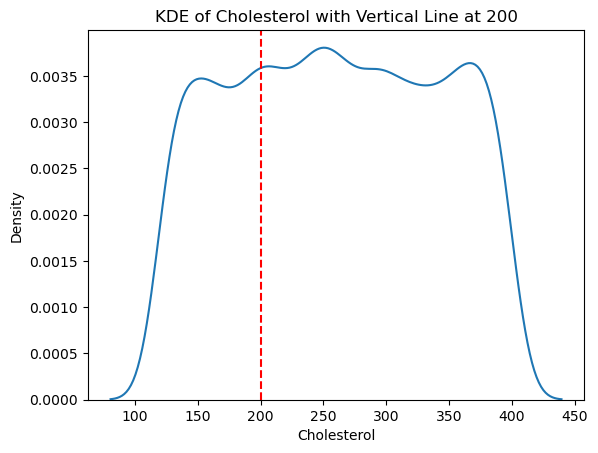

In [12]:
# Cholesterol, and how it affects heart attack risk
sns.kdeplot(df.Cholesterol)
plt.axvline(x=200, color='r', linestyle='--')

# Add some labels and a title for clarity
plt.title('KDE of Cholesterol with Vertical Line at 200')
plt.xlabel('Cholesterol')
plt.ylabel('Density')

# Show the plot
plt.show()

In [15]:
df[['Systolic BP', 'Diastolic BP']] = df['Blood Pressure'].str.split('/', expand=True).astype(int)
df = df.drop('Blood Pressure', axis=1)

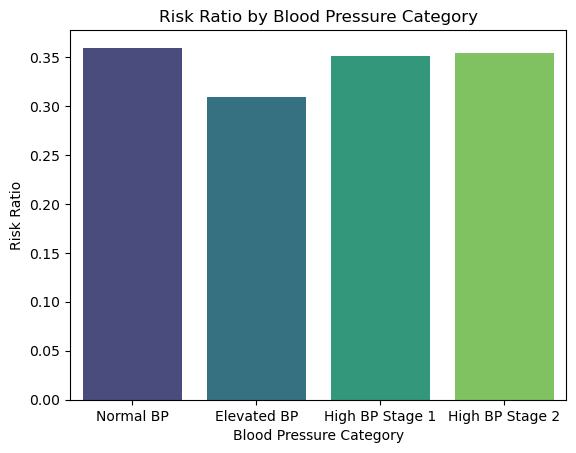

In [36]:
normal_bp = df[(df["Systolic BP"] < 120) & (df["Diastolic BP"] < 80)]
elevate_bp = df[(df["Systolic BP"] >= 120) & (df["Systolic BP"] <= 129) & (df["Diastolic BP"] < 80)]
high_bp = df[(df["Systolic BP"] >= 130) & (df["Systolic BP"] <= 139) & (df["Diastolic BP"] >= 80) & (df["Diastolic BP"] <= 89)]
high_bp_2 = df[(df["Systolic BP"] >= 140) & (df["Systolic BP"] <= 180) & (df["Diastolic BP"] >= 90) & (df["Diastolic BP"] <= 120)]

risk_ratio_normal = sum(normal_bp["Heart Attack Risk"])/len(normal_bp)
risk_ratio_elevate = sum(elevate_bp["Heart Attack Risk"])/len(elevate_bp)
risk_ratio_high = sum(high_bp["Heart Attack Risk"])/len(high_bp)
risk_ratio_high2 = sum(high_bp_2["Heart Attack Risk"])/len(high_bp_2)

risk_ratios = [risk_ratio_normal, risk_ratio_elevate, risk_ratio_high, risk_ratio_high2]
categories = ['Normal BP', 'Elevated BP', 'High BP Stage 1', 'High BP Stage 2']

# Plotting with Seaborn
sns.barplot(x=categories, y=risk_ratios, palette='viridis')
plt.xlabel('Blood Pressure Category')
plt.ylabel('Risk Ratio')
plt.title('Risk Ratio by Blood Pressure Category')
plt.show()

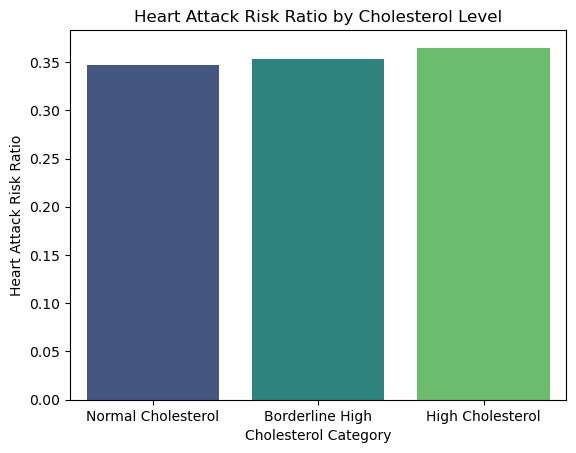

In [37]:
normal_chole = df[df.Cholesterol <= 200]
risk_chole = df[(df.Cholesterol > 200) & (df.Cholesterol <= 239)]
danger_chole = df[df.Cholesterol > 239]
risk_ratio_normal = sum(normal_chole["Heart Attack Risk"])/len(normal_chole)
risk_ratio_risk = sum(risk_chole["Heart Attack Risk"])/len(risk_chole)
risk_ratio_danger = sum(danger_chole["Heart Attack Risk"])/len(danger_chole)


risk_ratios_chole = [risk_ratio_normal, risk_ratio_risk, risk_ratio_danger]
chole_categories = ['Normal Cholesterol', 'Borderline High', 'High Cholesterol']

# Plotting with Seaborn
sns.barplot(x=chole_categories, y=risk_ratios_chole, palette='viridis')
plt.xlabel('Cholesterol Category')
plt.ylabel('Heart Attack Risk Ratio')
plt.title('Heart Attack Risk Ratio by Cholesterol Level')
plt.show()

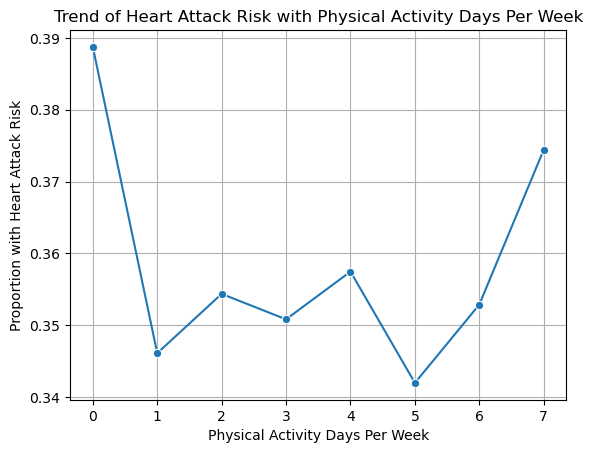

In [32]:
# Trend of Heart Attack Risk with Physical Activity Days Per Week
data_for_activity_days = data.groupby('Physical Activity Days Per Week')['Heart Attack Risk'].mean().reset_index()

# Plot
sns.lineplot(x = 'Physical Activity Days Per Week', y = 'Heart Attack Risk', \
             data = data_for_activity_days, marker = 'o')
plt.title('Trend of Heart Attack Risk with Physical Activity Days Per Week')
plt.xlabel('Physical Activity Days Per Week')
plt.ylabel('Proportion with Heart Attack Risk')
plt.grid(True)
plt.show()

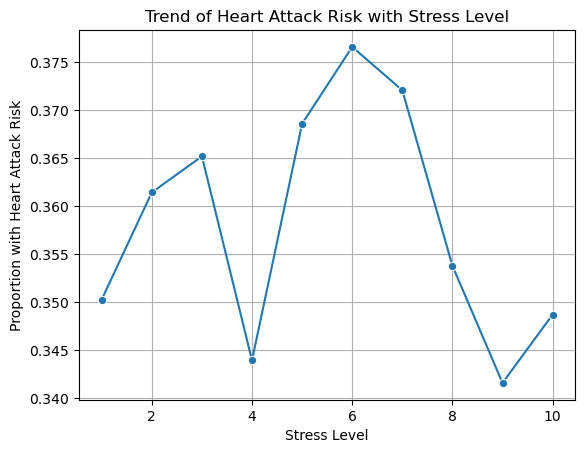

In [31]:
# Trend of Heart Attack Risk with Stress Level
data_for_stress = data.groupby('Stress Level')['Heart Attack Risk'].mean().reset_index()

# Plot
sns.lineplot(x = 'Stress Level', y = 'Heart Attack Risk', data = data_for_stress, marker = 'o')
plt.title('Trend of Heart Attack Risk with Stress Level')
plt.xlabel('Stress Level')
plt.ylabel('Proportion with Heart Attack Risk')
plt.grid(True)
plt.show()

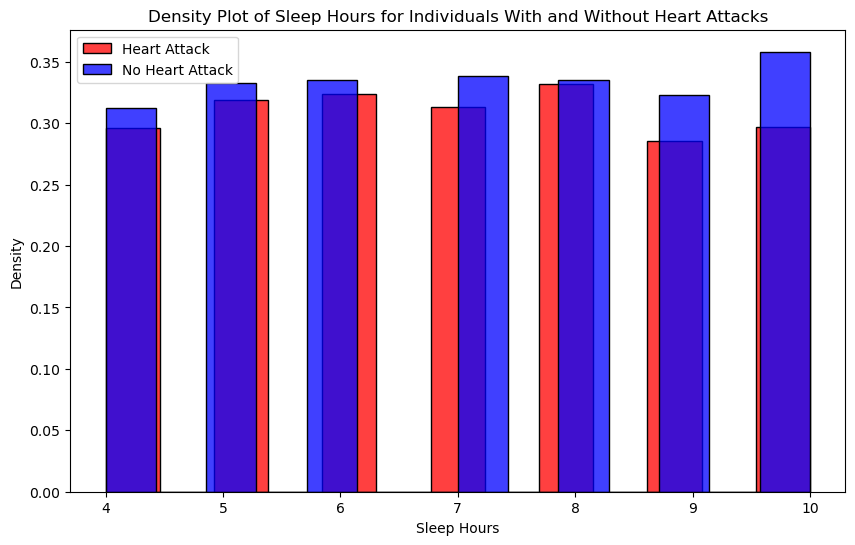

In [17]:
# Sleep Hours Per Day 
plt.figure(figsize=(10, 6))
sns.histplot(df[df['Heart Attack Risk'] == 1]['Sleep Hours Per Day'], color='red', label='Heart Attack', stat='density')
sns.histplot(df[df['Heart Attack Risk'] == 0]['Sleep Hours Per Day'], color='blue', label='No Heart Attack', stat='density')

# Adding titles and labels
plt.title('Density Plot of Sleep Hours for Individuals With and Without Heart Attacks')
plt.xlabel('Sleep Hours')
plt.ylabel('Density')
plt.legend()

# Display the plot
plt.show()

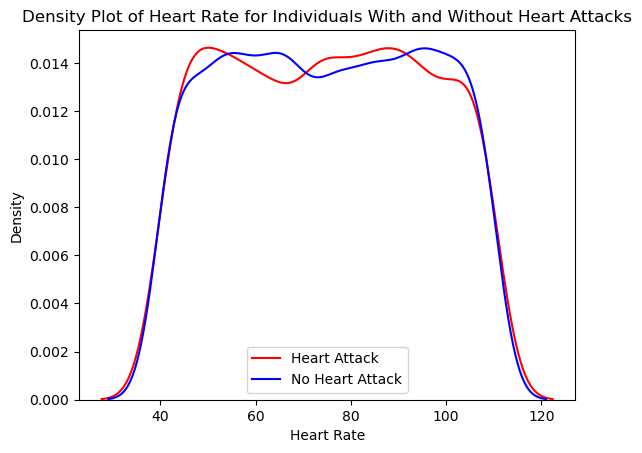

In [19]:
# Heart Rate
sns.kdeplot(df[df['Heart Attack Risk'] == 1]['Heart Rate'], color='red', label='Heart Attack')
sns.kdeplot(df[df['Heart Attack Risk'] == 0]['Heart Rate'], color='blue', label='No Heart Attack')

# Adding titles and labels
plt.title('Density Plot of Heart Rate for Individuals With and Without Heart Attacks')
plt.xlabel('Heart Rate')
plt.ylabel('Density')
plt.legend()

# Display the plot
plt.show()

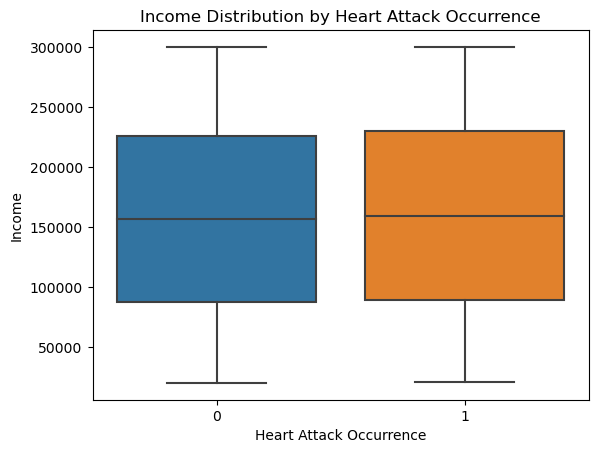

In [22]:
# Income
sns.boxplot(x='Heart Attack Risk', y='Income', data=df)

plt.title('Income Distribution by Heart Attack Occurrence')
plt.xlabel('Heart Attack Occurrence')
plt.ylabel('Income')

plt.show()

/var/folders/b0/k6xg8bmn5l7bl__9r1wpx8bm0000gn/T/ipykernel_45486/921878060.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[data['Heart Attack Risk'] == 0]['BMI'], label='Risk = 0', shade=True)
/var/folders/b0/k6xg8bmn5l7bl__9r1wpx8bm0000gn/T/ipykernel_45486/921878060.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[data['Heart Attack Risk'] == 1]['BMI'], label='Risk = 1', shade=True)


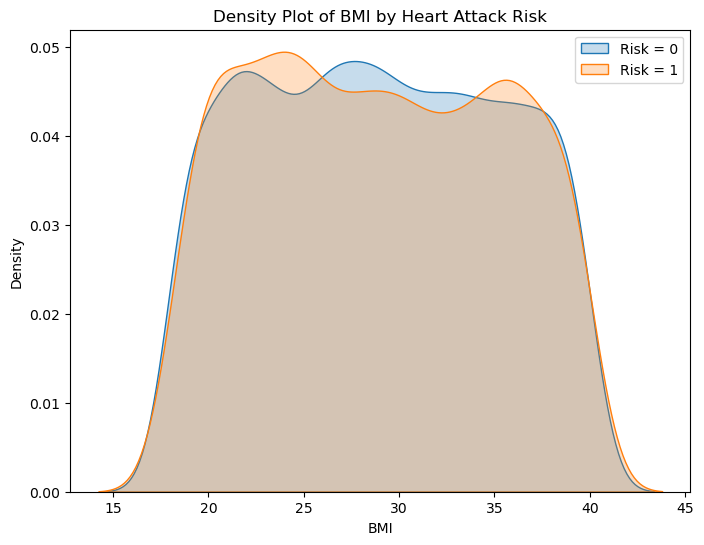

,count,mean,std,min,25%,50%,75%,max
Heart Attack Risk,,,,,,,,
0,5624.0,28.891350,6.314276,18.002337,23.420893,28.790270,34.267076,39.993581
1,3139.0,28.891617,6.328968,18.023511,23.425422,28.717106,34.479778,39.997211


In [11]:
bmi_descriptive_stats = df.groupby('Heart Attack Risk')['BMI'].describe()

# Histograms for BMI within each Heart Attack Risk group
plt.figure(figsize=(8, 6))
sns.kdeplot(df[df['Heart Attack Risk'] == 0]['BMI'], label='Risk = 0', shade=True)
sns.kdeplot(df[df['Heart Attack Risk'] == 1]['BMI'], label='Risk = 1', shade=True)
plt.title('Density Plot of BMI by Heart Attack Risk')
plt.xlabel('BMI')
plt.ylabel('Density')
plt.legend()
plt.show()

bmi_descriptive_stats

/var/folders/b0/k6xg8bmn5l7bl__9r1wpx8bm0000gn/T/ipykernel_45486/2771003405.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[data['Heart Attack Risk'] == 0]['Sedentary Hours Per Day'], label='Risk = 0', shade=True)
/var/folders/b0/k6xg8bmn5l7bl__9r1wpx8bm0000gn/T/ipykernel_45486/2771003405.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[data['Heart Attack Risk'] == 1]['Sedentary Hours Per Day'], label='Risk = 1', shade=True)


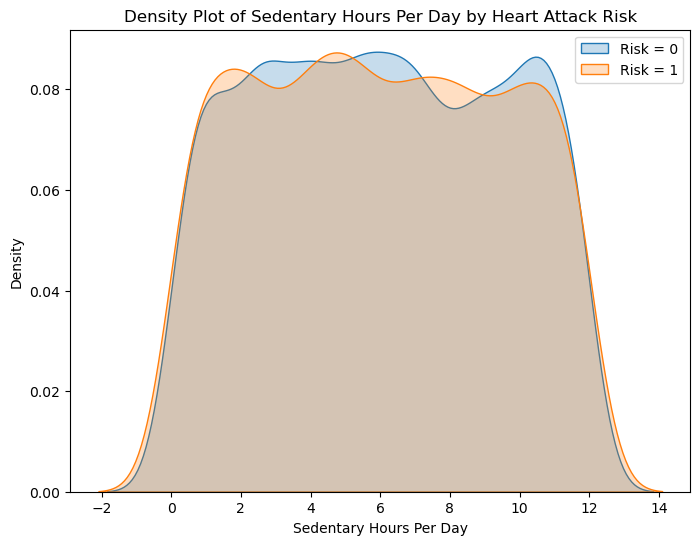

,count,mean,std,min,25%,50%,75%,max
Heart Attack Risk,,,,,,,,
0,5624.0,6.008225,3.453524,0.001263,3.015570,5.939222,9.038082,11.992341
1,3139.0,5.967648,3.489638,0.001529,2.917796,5.898037,8.977283,11.999313


In [12]:
shpd_descriptive_stats = df.groupby('Heart Attack Risk')['Sedentary Hours Per Day'].describe()

plt.figure(figsize=(8, 6))
sns.kdeplot(df[df['Heart Attack Risk'] == 0]['Sedentary Hours Per Day'], label='Risk = 0', shade=True)
sns.kdeplot(df[df['Heart Attack Risk'] == 1]['Sedentary Hours Per Day'], label='Risk = 1', shade=True)
plt.title('Density Plot of Sedentary Hours Per Day by Heart Attack Risk')
plt.xlabel('Sedentary Hours Per Day')
plt.ylabel('Density')
plt.legend()
plt.show()

shpd_descriptive_stats

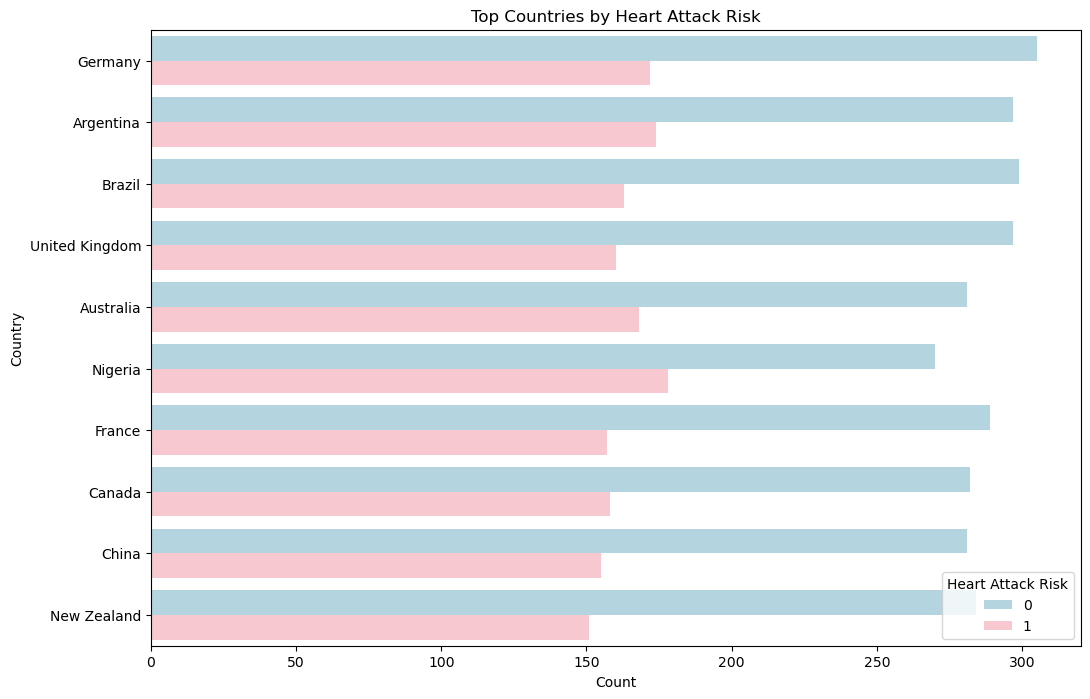

In [25]:
# Country (Yes)
# Identifying the top 10 countries by the number of participants
top_countries = df['Country'].value_counts().nlargest(10).index

# Filtering the dataset for these top countries
data_top_countries = df[df['Country'].isin(top_countries)]

# Country and Heart Attack Risk
palette = {0: "lightblue", 1: "pink"}
plt.figure(figsize=(12, 8))
sns.countplot(y='Country', hue='Heart Attack Risk', data=data_top_countries, order=top_countries,palette=palette)
plt.title('Top Countries by Heart Attack Risk')
plt.xlabel('Count')
plt.ylabel('Country')
plt.legend(title='Heart Attack Risk', loc='lower right')
plt.show()

<Figure size 1000x600 with 0 Axes>

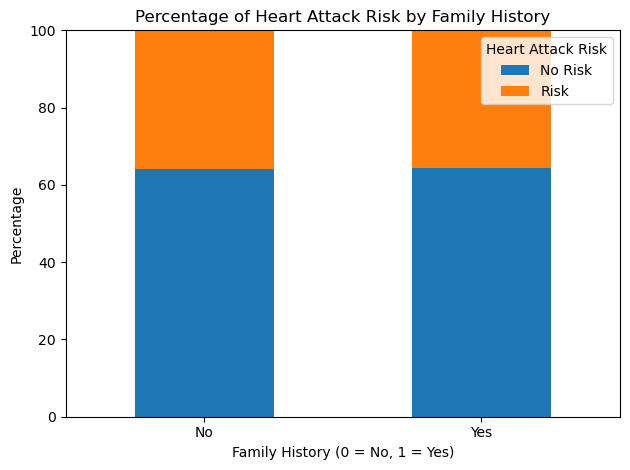

Heart Attack Risk,0,1
Family History,,
0,64.100833,35.899167
1,64.259259,35.740741


In [14]:
# Descriptive Statistics: Count of Heart Attack Risk by Family History
family_history_risk_counts = df.groupby(['Family History', 'Heart Attack Risk']).size().unstack()
# Calculate the percentage of Heart Attack Risk by Family History
family_history_risk_percentage = family_history_risk_counts.div(family_history_risk_counts.sum(axis=1), axis=0) * 100

# Visualizations: Bar Plot for Heart Attack Risk percentage based on Family History
plt.figure(figsize=(10, 6))

# Plotting
family_history_risk_percentage.plot(kind='bar', stacked=True, color=['#1f77b4', '#ff7f0e'])
plt.title('Percentage of Heart Attack Risk by Family History')
plt.xlabel('Family History (0 = No, 1 = Yes)')
plt.ylabel('Percentage')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'], rotation=0)
plt.legend(title='Heart Attack Risk', labels=['No Risk', 'Risk'], loc='upper right')
plt.ylim(0, 100)
plt.tight_layout()

# Show plot
plt.show()

family_history_risk_percentage


<Figure size 1000x600 with 0 Axes>

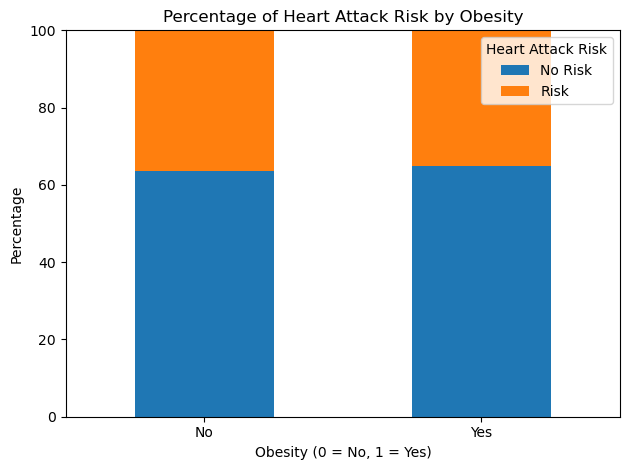

Heart Attack Risk,0,1
Obesity,,
0,63.538567,36.461433
1,64.815658,35.184342


In [20]:
# Descriptive Statistics: Count of Heart Attack Risk by Obesity
obesity_counts = df.groupby(['Obesity', 'Heart Attack Risk']).size().unstack()
# Calculate the percentage of Heart Attack Risk by Obesity
obesity_percentage = obesity_counts.div(obesity_counts.sum(axis=1), axis=0) * 100

# Visualizations: Bar Plot for Heart Attack Risk percentage based on Obesity
plt.figure(figsize=(10, 6))

# Plotting
obesity_percentage.plot(kind='bar', stacked=True, color=['#1f77b4', '#ff7f0e'])
plt.title('Percentage of Heart Attack Risk by Obesity')
plt.xlabel('Obesity (0 = No, 1 = Yes)')
plt.ylabel('Percentage')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'], rotation=0)
plt.legend(title='Heart Attack Risk', labels=['No Risk', 'Risk'], loc='upper right')
plt.ylim(0, 100)
plt.tight_layout()

# Show plot
plt.show()

obesity_percentage

<Figure size 1000x600 with 0 Axes>

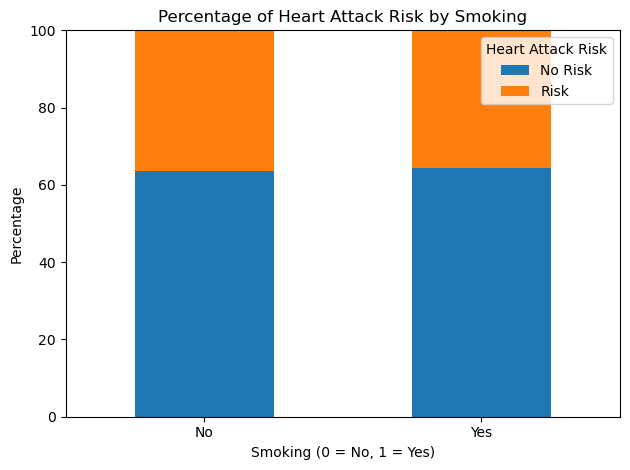

Heart Attack Risk,0,1
Smoking,,
0,63.606195,36.393805
1,64.244815,35.755185


In [21]:
# Descriptive Statistics: Count of Heart Attack Risk by Smoking
smoking_counts = df.groupby(['Smoking', 'Heart Attack Risk']).size().unstack()
# Calculate the percentage of Heart Attack Risk by Smoking
smoking_percentage = smoking_counts.div(smoking_counts.sum(axis=1), axis=0) * 100

# Visualizations: Bar Plot for Heart Attack Risk percentage based on Smoking
plt.figure(figsize=(10, 6))

# Plotting
smoking_percentage.plot(kind='bar', stacked=True, color=['#1f77b4', '#ff7f0e'])
plt.title('Percentage of Heart Attack Risk by Smoking')
plt.xlabel('Smoking (0 = No, 1 = Yes)')
plt.ylabel('Percentage')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'], rotation=0)
plt.legend(title='Heart Attack Risk', labels=['No Risk', 'Risk'], loc='upper right')
plt.ylim(0, 100)
plt.tight_layout()

# Show plot
plt.show()

smoking_percentage

<Figure size 1000x600 with 0 Axes>

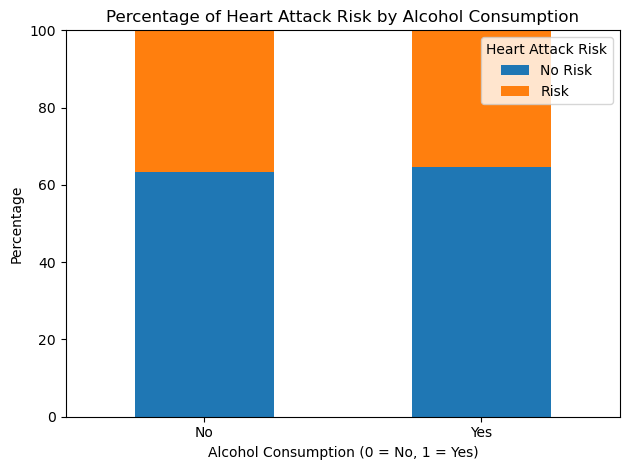

Heart Attack Risk,0,1
Alcohol Consumption,,
0,63.373083,36.626917
1,64.720473,35.279527


In [22]:
# Descriptive Statistics: Count of Heart Attack Risk by Alcohol Consumption
alcohol_comsuption_counts = df.groupby(['Alcohol Consumption', 'Heart Attack Risk']).size().unstack()
# Calculate the percentage of Heart Attack Risk by Alcohol Consumption
alcohol_comsuption_percentage = alcohol_comsuption_counts.div(alcohol_comsuption_counts.sum(axis=1), axis=0) * 100

# Visualizations: Bar Plot for Heart Attack Risk percentage based on Alcohol Consumption
plt.figure(figsize=(10, 6))

# Plotting
alcohol_comsuption_percentage.plot(kind='bar', stacked=True, color=['#1f77b4', '#ff7f0e'])
plt.title('Percentage of Heart Attack Risk by Alcohol Consumption')
plt.xlabel('Alcohol Consumption (0 = No, 1 = Yes)')
plt.ylabel('Percentage')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'], rotation=0)
plt.legend(title='Heart Attack Risk', labels=['No Risk', 'Risk'], loc='upper right')
plt.ylim(0, 100)
plt.tight_layout()

# Show plot
plt.show()

alcohol_comsuption_percentage

In [ ]:
# Age distribution
sns.kdeplot(df.Age);

Heart Attack Risk,Age Group,Percentage
0,0-29,36.018642
1,30-39,35.510204
2,40-49,36.719400
3,50-59,33.996540
4,60-69,34.413965
5,70-79,37.213404
6,80-89,36.806723
7,90-99,36.184211


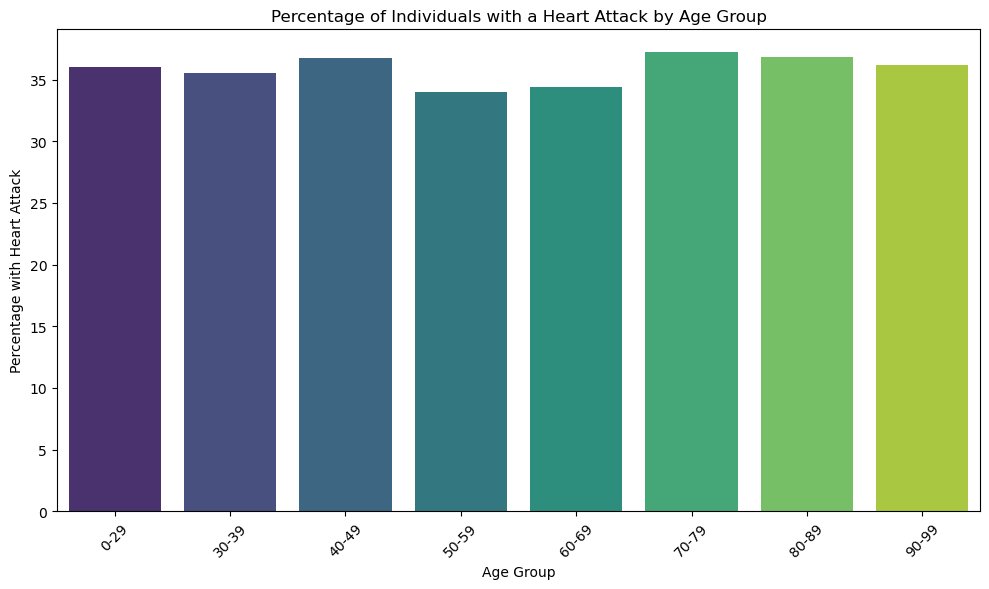

In [29]:
# Categorize age into groups
df['Age Group'] = pd.cut(df['Age'], bins=[0, 29, 39, 49, 59, 69, 79, 89, 99], 
                           labels=['0-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90-99'])

# Calculate the percentage of individuals with a heart attack in each age group
age_group_heart_attack = df.groupby(['Age Group', 'Heart Attack Risk']).size().unstack().fillna(0)
age_group_heart_attack['Percentage'] = (age_group_heart_attack[1] / (age_group_heart_attack[0] + age_group_heart_attack[1])) * 100

# Reset index for plotting
age_group_heart_attack.reset_index(inplace=True)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='Age Group', y='Percentage', df=age_group_heart_attack, palette='viridis')
plt.title('Percentage of Individuals with a Heart Attack by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Percentage with Heart Attack')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the calculated percentages for reference
age_group_heart_attack[['Age Group', 'Percentage']]


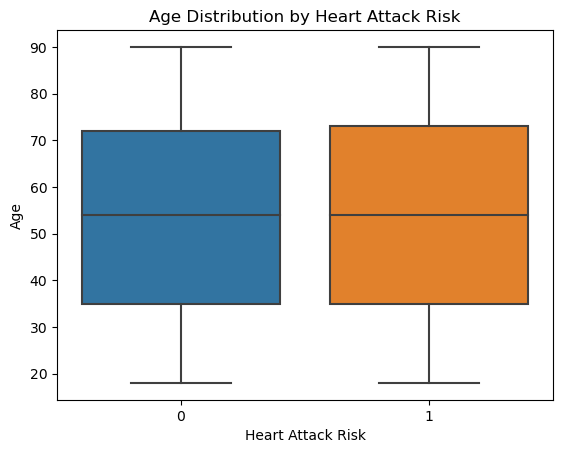

In [27]:
# Age (no significant effect)

sns.boxplot(x='Heart Attack Risk', y='Age', data=df)
plt.title('Age Distribution by Heart Attack Risk')
plt.xlabel('Heart Attack Risk')
plt.ylabel('Age')
plt.show()

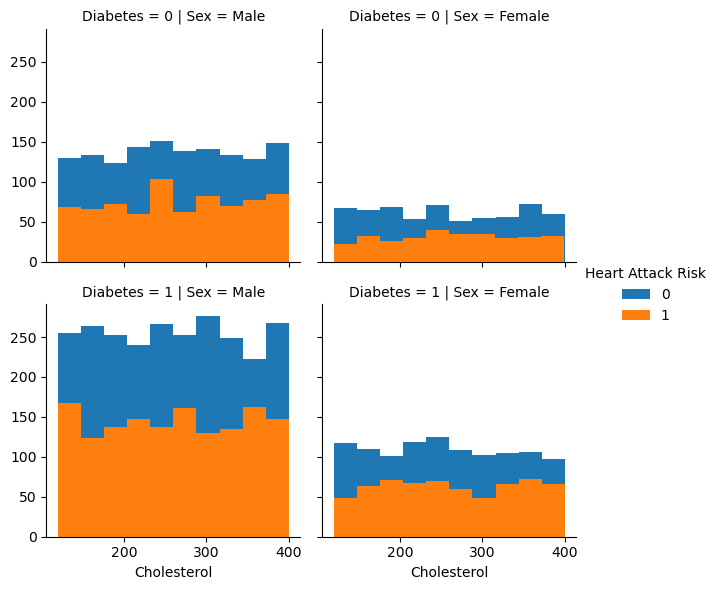

In [33]:
# How the Distribution of Cholesterol Levels Varies by Sex or Diabetes Status
g = sns.FacetGrid(data, col = "Sex", row = "Diabetes", hue = "Heart Attack Risk")
g = g.map(plt.hist, 'Cholesterol').add_legend()

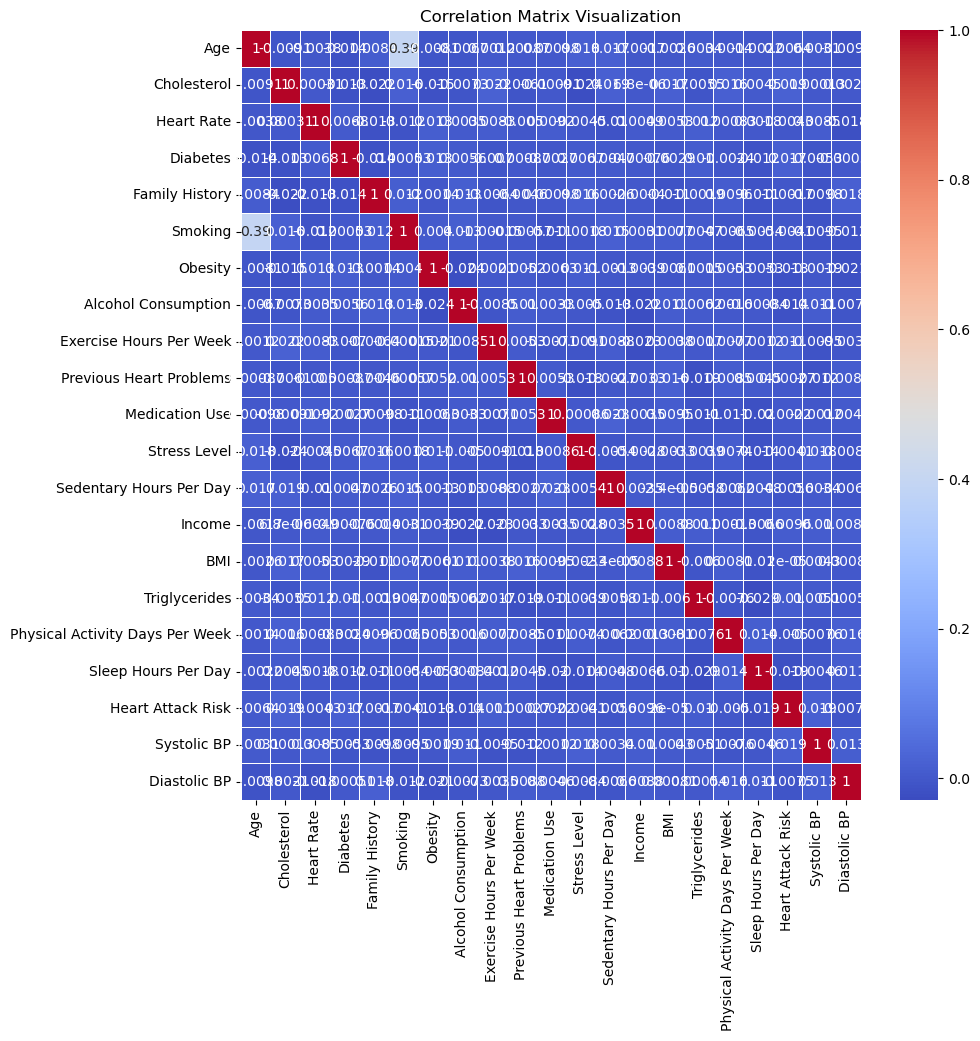

In [34]:
numerical_df = df.select_dtypes(include=['number'])
cor_matrix = numerical_df.corr()
plt.figure(figsize=(10, 10))  # Set the figure size (optional)
sns.heatmap(cor_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix Visualization')
plt.show()